#### A: 500 пациентов
В этой и последующих задачах вы будете работать с медицинским датасетом, собранным больницей в Гренландии, которая пытается улучшить оказание медицинской помощи через выявление показателей выживаемости пациентов. Оригинальный датасет доступен по ссылке https://www.kaggle.com/datasets/rsrishav/patient-survival-after-one-year-of-treatment?select=Testing_set_advance.csv.

В датасете находятся следующие переменные: возраст пациента, диагностированное состояние, употребляемые лекарства при лечении, выжил ли пациент после года лечения, и другие показатели.

В 9-ой главе написано, что для проведения эксперимента в рамках полученных данных необходимо следовать правилу случайного отбора.

В этой задаче вам необходимо отобрать случайные 500 строк из датасета и вывести полученный размер с помощью функции shape().

Датасет доступен под названием "Patient Survival.csv".

In [23]:
import pandas as pd

df = pd.read_csv('Patient Survival.csv')

df_sample = df.sample(500)

print(df_sample.shape)

(500, 20)


#### B: Разные группы пациентов
Для проведения эксперимента в рамках полученных данных необходимо следовать правилу случайного отбора.

В оригинальном датасете в переменной 'Treated_with_drugs' присутствовало более 30 названий препаратов. Мы отфильтровали датасет по двум самым часто назначаемым лекарствам.

То есть, переменная 'Treated_with_drugs' стала бинарной, в ней содержится только два значения 'DX6' и 'DX5'.

Наш эксперимент будет фиксировать различие выживаемости в зависимости от двух назначенных лекарств. То есть одна группа пациентов принимала лекарства 'DX6' на протяжении года лечения, а другая группа пациентов употребляла 'DX5'.

Аналогично первой задаче, вам необходимо выбрать случайное количество строк, но уже сгруппированных относительно переменной 'Treated_with_drugs'. У вас должно быть по 30 наблюдений из каждой группы. Случайная группировка должна учитывать пять переменных, с которыми мы будем работать в последующих задачах: 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Diagnosed_Condition', 'Survived_1_year'`.

В выдаче выведите размер нового датасета.

Датасет доступен под названием "Patient Survival.csv".

In [24]:
import pandas as pd

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=42)

df_grouped = df_grouped[['Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Diagnosed_Condition', 'Survived_1_year']]

print(df_grouped.shape)

(60, 5)


#### C: Q-Q plot и проверка нормальности
В этой задаче заранее была проведена проверка на нормальность распределения данных через квантильный график.

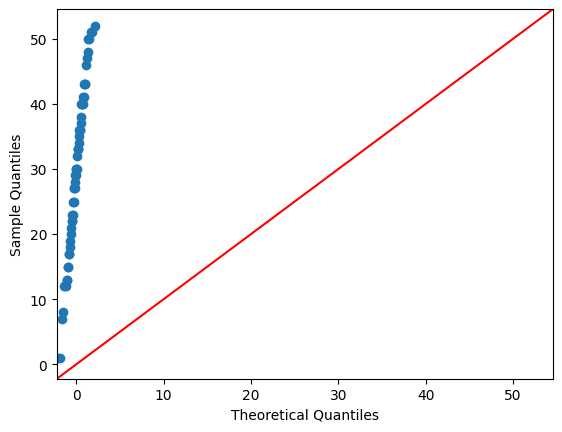

Нас интересует разница между результатами диагностированного состояния после приема препаратов 'DX6' и 'DX5'.

Посмотрите на выведенный график диагностированного состояния и скажите, как распределены данные:

"Наблюдаемые значения распределены не нормально".

"Наблюдаемые значения распределены нормально".

Результат выведите цифрой, например, "print(1)" или "print(2)"

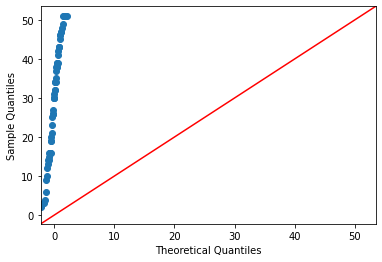

In [25]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=42)

sm.qqplot(df_grouped['Diagnosed_Condition'], dist=stats.norm, line='45')
plt.show()

# print(1)

#### D: Распределение значений переменной в разных группах, t-тест
В книге мы говорили, что t-тест проверяет, значима ли разница средних между двумя группами.

Переменная 'Patient_Smoker' из нашего датасета показывает, курили пациенты или нет.

Перед вами визуализация распределения разницы диагностированного состояния пациентов, которые курили или не курили.

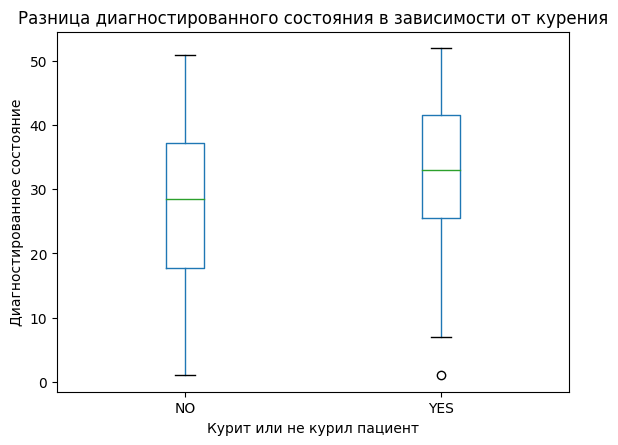

Проанализируейте график и выведите правильное утверждение:

"Разброс между курящими и не курящими группами пациентов отличается. У курильщиков меньший разброс, чем у группы не-курильщиков. Медианное значение отличается."

"Разброс между курящими и не курящими группами пациентов отличается. У курильщиков больший разброс, чем у группы не-курильщиков. Медианное значение отличается."

Результат выведите цифрой, например, "print(1)" или "print(2)".

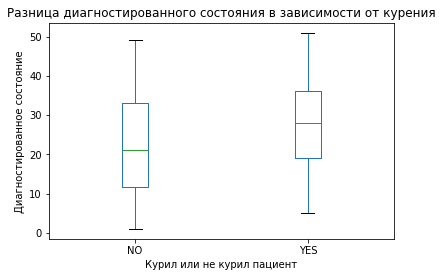

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=1)

df_grouped.boxplot(by='Patient_Smoker', column=['Diagnosed_Condition'], grid = False)

plt.suptitle('')
plt.title('Разница диагностированного состояния в зависимости от курения')
plt.xlabel('Курил или не курил пациент')
plt.ylabel('Диагностированное состояние')
plt.show()

# print(1)

#### E: ANOVA
С помощью ANOVA мы можем сравнивать средние в трех группах и более. Посмотрим на разницу диагностированного состояния в зависимости от возраста пациента.

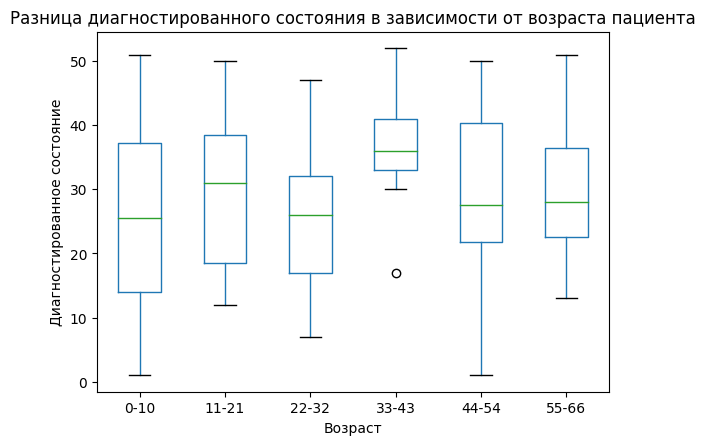

Выведите правильное утверждение относительно графика:

"Разброс диагностированного состояния в разных возрастных группах практически не отличается. Медианное значение примерно одинаково."

"Разброс диагностированного состояния в разных возрастных группах отличается. Медианное значение примерно одинаково."

"Разброс диагностированного состояния в разных возрастных группах значительно отличается. Медианное значение не одинаково."

Результат выведите цифрой, например, "print(1)" или "print(2)".

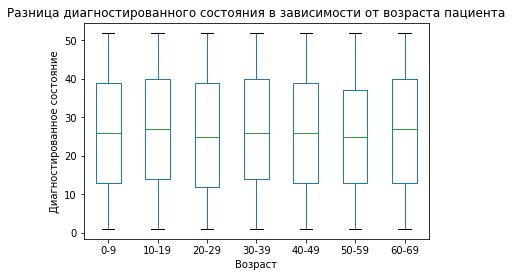

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=42)

df['Patient_Age'] = (df['Patient_Age'] // 10 * 10).astype(str) + '-' + (df['Patient_Age'] // 10 * 10 + 9).astype(str)

df.boxplot(by='Patient_Age', column=['Diagnosed_Condition'], grid = False)

plt.suptitle('')
plt.title('Разница диагностированного состояния в зависимости от возраста пациента')
plt.xlabel('Возраст')
plt.ylabel('Диагностированное состояние')
plt.show()

# print(3)

#### F: MANOVA
Как можно было бы по-другому оформить график из 5-ой задачи?

Можно было бы рассмотреть результат диагностированного состояния для пациентов, принимающих разные лекарства с поправкой на возраст в зависимости от группы.

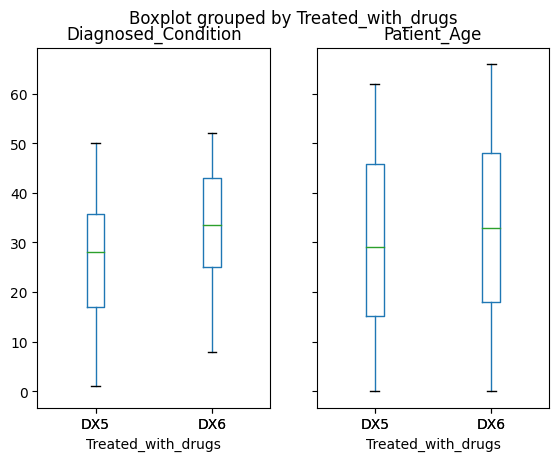

Проанализируйте график и выведите правильный ответ:

"Распределения возраста в группах разных лекарств различны. Медиана с поправкой на возраст среди принимаемых лекарств отличается. В другом графике, без поправки на возраст, медианы не имеют таких значительных различий."

"Распределения возраста в группах разных лекарств различны. Медиана с поправкой на возраст среди принимаемых лекарств отличается. В другом графике, без поправки на возраст, медианы имеют различия."

"Распределения возраста в группах разных лекарств не отличаются. Медиана с поправкой на возраст среди принимаемых лекарств не отличается. В другом графике, без поправки на возраст, медианы имеют значительные различия."

Результат выведите цифрой, например, "print(1)" или "print(2)".

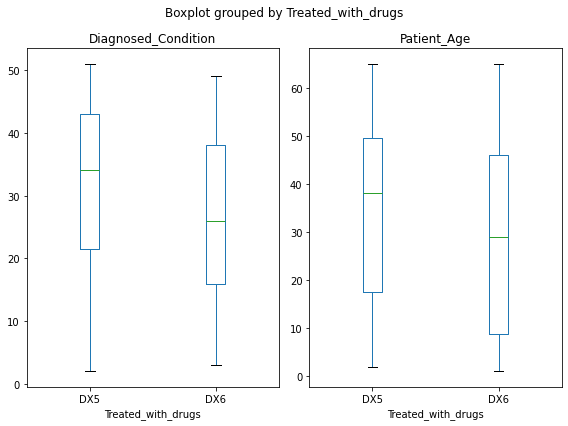

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

df_grouped.boxplot(by='Treated_with_drugs', column='Diagnosed_Condition', grid=False, ax=axes[0])
axes[0].set_title('Diagnosed_Condition')

df_grouped.boxplot(by='Treated_with_drugs', column='Patient_Age', grid=False, ax=axes[1])
axes[1].set_title('Patient_Age')

plt.tight_layout()
plt.show()

# print(2)

#### G: Визуализация хи-квадрата
Напоминаем, что в хи-квадрате мы сравниваем соотношения двух категориальных переменных.

Представим сравнение двух переменных: 'Patient_Smoker' (курил ли пациент или нет) и 'Survived_1_year' (умер ли пациент после года лечения или нет). Перед вами мозаичный график, который показывает пропорции категорий.

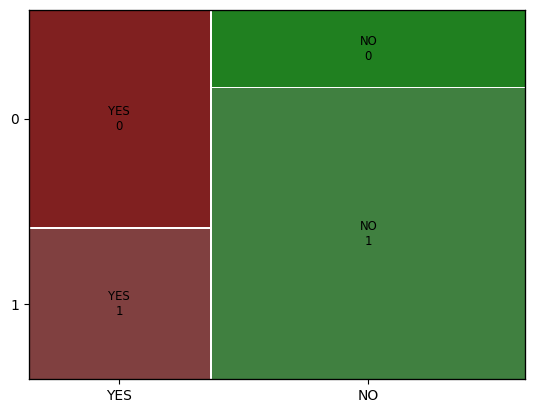

Выберите правильное утверждение:

"Из графика видно, что в группе некурящих пациентов наибольшее количество людей, которые умерли после года лечения. Наименьшую пропорцию составляет группа некурящих пациентов, которые выжили после года лечения."

"Из графика видно, что в группе некурящих пациентов наименьшее количество людей, которые умерли после года лечения. Наибольшую пропорцию составляет группа некурящих пациентов, которые выжили после года лечения."

Результат выведите цифрой, например, "print(1)" или "print(2)".

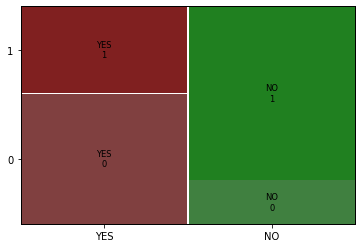

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=42)

mosaic(df_grouped, ['Patient_Smoker','Survived_1_year'])

plt.show()

# print(1) ???

#### H: Визуализация корреляции
Корреляция — это тест на проверку статистической связи двух числовых и непрерывных переменных.

В этой задаче мы будем визуализировать, как индекс массы тела пациента связан с возрастом.

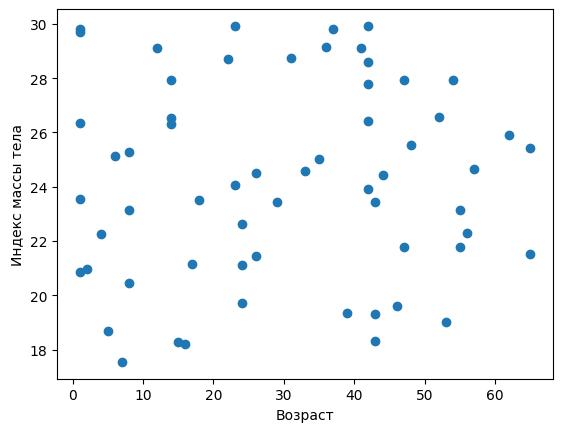

Выберите правильное утверждение:

"Коэффициент корреляции между этими переменными близок к 0, между ними почти нет статистически значимой связи."

"Коэффициент корреляции между этими переменными близок к 50, между ними есть статистически значимая связь."

"Коэффициент корреляции между этими переменными близок к 100, и между ними есть статистическая значимая связь."

Результат выведите цифрой, например, "print(1)" или "print(2)".

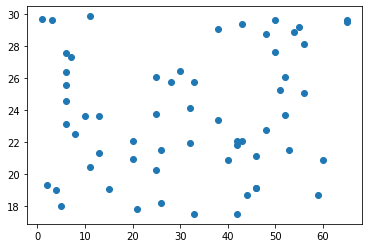

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=42)

plt.scatter(df_grouped['Patient_Age'], df_grouped['Patient_Body_Mass_Index'])
plt.show()

# print(1)

#### I: Корреляция
Для выявления точного значения корреляции между двумя переменными (возраст и индекс массы тела) мы использовали функцию corrcoef(), которая была описана в главе 9.3. Значение корреляции составило "0.05369718182207669".

Выберите правильное утверждение и выведите его в ответе:

"Коэффициент корреляции между этими переменными близок к 0, между ними почти нет статистически значимой связи."

"Коэффициент корреляции между этими переменными близок к 50, между ними есть статистически значимая связь."

"Коэффициент корреляции между этими переменными близок к 100, и между ними есть статистическая значимая связь."

Результат выведите цифрой, например, "print(1)" или "print(2)".

In [70]:
import pandas as pd
import numpy as np

df = pd.read_csv('Patient Survival.csv')

df_grouped = df.groupby('Treated_with_drugs').sample(n=30, random_state=1)

np.corrcoef(df_grouped['Patient_Age'], df_grouped['Patient_Body_Mass_Index'])[0, 1]

# print(1)

0.03621355361998876